# Método da Bisseção

Este método pode ser usado para encontrar as raízes de uma função contínua. A cada passo, o erro absoluto é reduzido pela metade, e assim o método converge linearmente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Implementação:

Método da bisseção, com limite por numero de iterações e tolerância de erro.

In [2]:
def bissecao(f, a, b, tol=1e-10, lim_iter=1000, ignorarValueError=False):
    '''
    f: funcao
    a, b: intervalo [a, b]
    tol: tolerancia de erro, padrao .00000001%
    lim_iter: numero maximo de iteracoes
    ignorarValueError: comeca a computar mesmo se f() do intervalo tiver sinais diferentes.
    nao vai encontrar uma raiz, mas mantem o historico
    
    retorna tuple (raiz, DataFrame)
    '''
    
    df = pd.DataFrame([],columns=['a', 'b', 'x', 'erro'])
    
    if not ignorarValueError:
        if np.sign(f(b)) * np.sign(f(a)) != -1:
            raise ValueError('raiz inexistente; intervalo deve ter sinais opostos')

    erro = 1
    xa = a # xi-1
    # loop tem capacidade de rodar (lim_iter) vezes, mas finaliza caso encontre
    # a raiz exata f(x) = 0, ou ao alcancar tolerancia de erro desejada
    for i in range(lim_iter):
        x = (a+b)/2
        df.loc[len(df)] = [a, b, x, erro]
            
        if erro <= tol:
            return x, df
            
        if f(x) == 0:
            return x, df
        else:
            if np.sign(f(a)) * np.sign(f(x)) == -1:
                b = x 
            else:
                a = x
        try:
            erro = abs((x - xa)/x)
        except ZeroDivisionError:
            pass
        xa = x
    
    return x, df

## Exemplos

### 1. f (x) = −0.5x^2 + 2.5x + 4.5

In [3]:
f = lambda x: -1*(0.5)*x**2 + 2.5*x + 4.5

### Representação gráfica:

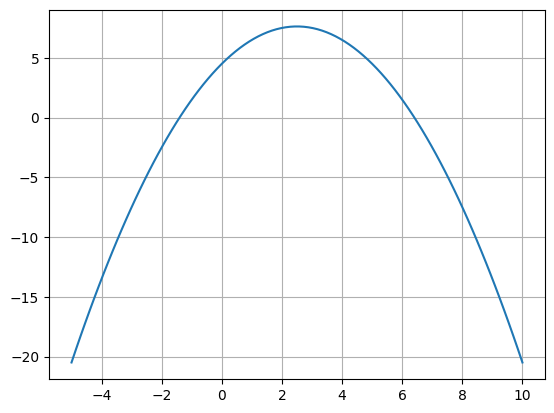

In [4]:
x = np.linspace(-5, 10, 100)
plt.plot(x, f(x))
plt.grid()

### Formula quadratica:

In [5]:
def bhaskara(a, b, c) -> float:
    delta = b**2 - (4*a*c)
    x1 = (-b + np.sqrt(delta)) / (2*a)
    x2 = (-b - np.sqrt(delta)) / (2*a)
    
    return x1, x2

In [6]:
bhaskara(-0.5, 2.5, 4.5)

(-1.405124837953327, 6.405124837953327)

### Usando o método da bisseção:

Encontrando uma aproximação da maior raiz utilizando apenas 3 iterações: erro final de 20%

In [7]:
bissecao(f, 5, 10, lim_iter=3)[0]

6.875

In [8]:
bissecao(f, 5, 10, lim_iter=3)[1]

,a,b,x,erro
0,5.00,10.0,7.500,1.000000
1,5.00,7.5,6.250,0.333333
2,6.25,7.5,6.875,0.200000


## 3. Sen x = x^3

Calculos ate erro ser menor que 2%

In [9]:
g = lambda x: np.sin(x) - x**3
bissecao(g, 0.5, 1, tol=.02)[1]

,a,b,x,erro
0,0.500000,1.0000,0.750000,1.000000
1,0.750000,1.0000,0.875000,0.333333
2,0.875000,1.0000,0.937500,0.142857
3,0.875000,0.9375,0.906250,0.066667
4,0.906250,0.9375,0.921875,0.034483
5,0.921875,0.9375,0.929688,0.016949


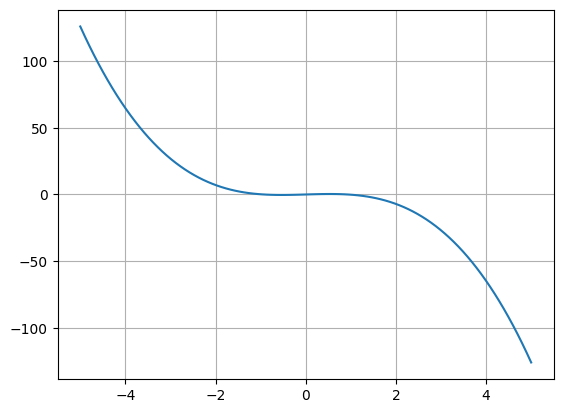

In [10]:
x = np.linspace(-5, 5, 100)
plt.plot(x, g(x))
plt.grid()

## 4.  −2x^6 − 1.5x^4 + 10x + 20

Encontrando o ponto máximo da função:

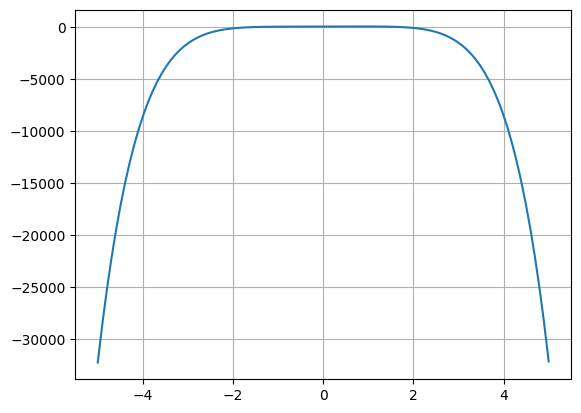

In [11]:
f = lambda x: -2*(x**6) - 1.5*(x**4) + 10*x + 20
plt.plot(x, f(x))
plt.grid()

In [12]:
bissecao(f, 0, 1, tol=.05, ignorarValueError=True)[1].sort_values(by=['x'], ascending=False).head(1)

,a,b,x,erro
5,0.96875,1.0,0.984375,0.032258


Valor maximo de f(x): em torno de 0.984375

## Método da falsa posição

Enquanto o método da bissecção divide o intervalo em duas partes iguais e utiliza o ponto médio como nova aproximação, **o método da falsa posição utiliza uma interpolação linear para obter uma nova aproximação**

In [13]:
def falsa_pos(f, a, b, tol=1e-10, lim_iter=1000):
    df = pd.DataFrame([],columns=['a', 'b', 'x', 'erro'])

    if np.sign(f(b)) * np.sign(f(a)) != -1:
            raise ValueError('intervalo deve ter sinais opostos')

    else:
        erro = 1
        xa = a
        for i in range(lim_iter):
            # A diferenca entre os dois algoritmos esta na forma de calcular a aproximacao:
            x = (a * f(b) - b * f(a)) / (f(b) - f(a))
            df.loc[len(df)] = [a, b, x, erro]
            
            if erro <= tol:
                return x, df
            
            if f(x) == 0:
                return x, df

            if f(a) * f(x) < 0:
                b = x
            else:
                a = x
            try:
                erro = abs((x - xa)/x)
            except ZeroDivisionError:
                pass
                
            xa=x

    return x, df


### g(x) do exemplo 3

In [14]:
raizFP = falsa_pos(g, .5, 1)
print('raiz', raizFP[0], 'encontrada em', raizFP[1].size, 'iteracoes')

raiz 0.9286263087315695 encontrada em 52 iteracoes


In [15]:
raizB = bissecao(g, .5, 1)
print('raiz', raizB[0], 'encontrada em', raizB[1].size, 'iteracoes')

raiz 0.9286263087124098 encontrada em 136 iteracoes


Algoritmo da falsa posicao precisou de menos da metade de iteracoes para encontrar uma resposta.

###  f (x) = 2 − e^x

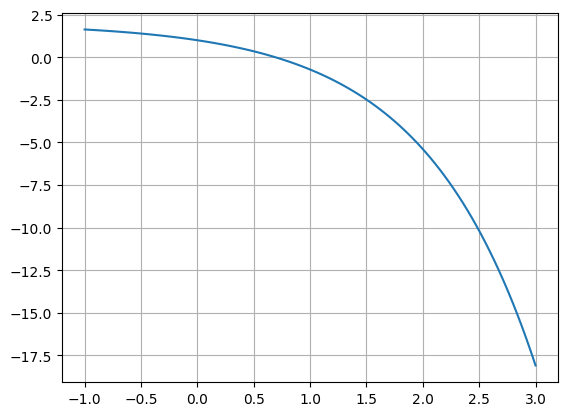

In [16]:
x = np.linspace(-1, 3, 100)
f = lambda x: 2 - np.e**x
plt.plot(x, f(x))
plt.grid()

**com o algoritmo da falsa posicao:**

In [17]:
raizFP = falsa_pos(f, 0, 1)
print('raiz aprox.', raizFP[0], 'encontrada em', raizFP[1].size, 'iteracoes')

raiz aprox. 0.6931471805584485 encontrada em 56 iteracoes


**com o algoritmo da bissecao:**

In [18]:
raizB = bissecao(f, 0, 1)
print('raiz aprox.', raizB[0], 'encontrada em', raizB[1].size, 'iteracoes')

raiz aprox. 0.6931471805728506 encontrada em 140 iteracoes


O metodo da falsa posicao se mostra mais eficiente.